## Stage III, Member Task: Andrew Van Es

### Part 1: Distribution

#### Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 cases. (25 points)

  -  Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.
  -  Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.
  - Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats.distributions import gamma

# Import our deaths and cases data csv's and previous data from stage 1 and 2
covD = pd.read_csv('Data/covid_deaths_usafacts.csv')
covC = pd.read_csv('Data/covid_confirmed_usafacts.csv')
covP = pd.read_csv('Data/covid_county_population_usafacts.csv')
State6 = pd.read_csv('Data/6_State_case_stats-v1.csv').set_index('Unnamed: 0')

# Altering the data from stage 2
State61 = State6.T
State61.head()

Unnamed: 0,CuGAVal,TXCase,FLCase,NCCase,SCCase,NVCase
0,3514,7915,10109,1640,1778,631
1,2564,7555,9483,2083,1826,985
2,2451,8258,11463,1434,1847,858
3,2160,3449,10059,1326,1457,843
4,2072,5318,6336,1537,1529,491


In [2]:
# Getting the mean and the variance for the distrabution
gamean = State61.mean() 
varga = State61.var() 

print('GA means', gamean)
print('GA variance', varga)

GA means Unnamed: 0
CuGAVal    2665.369565
TXCase     8719.679348
FLCase     6327.815217
NCCase     2559.336957
SCCase     1465.750000
NVCase     1106.820652
dtype: float64
GA variance Unnamed: 0
CuGAVal    2.191442e+06
TXCase     4.789199e+07
FLCase     1.452058e+07
NCCase     7.446885e+06
SCCase     1.255042e+06
NVCase     8.247859e+05
dtype: float64


In [3]:
# getting our alpha and beta values for our gamma distrabution
alm = gamean ** 2 / varga
bem = (varga / gamean)

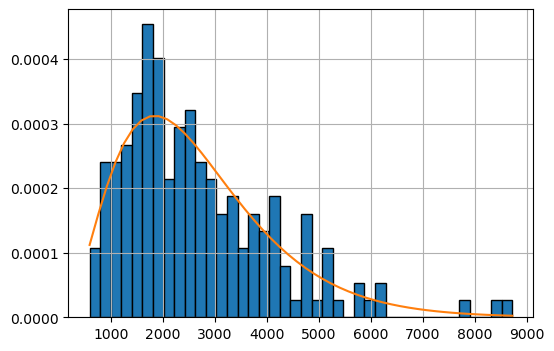

In [4]:
# Plotting the GA case gamma distrabution 
State61.CuGAVal.hist(density=True, bins=40, ec='black', figsize=(6,4))
x = np.linspace(State61.CuGAVal.min(), State61.CuGAVal.max())
plt.plot(x, gamma.pdf(x, a=alm[0], scale=bem[0]))

#### Describe the distribution for GA:
- The distribution that was used was a gamma distribution with probability distribution function.
- Since the data is skewed to the right gamma made sense to use here.

In [5]:
print('Center of the distribution by mean: ', gamean[0])
print('Variance of the distribution:', varga[0])

#skewness of the dist
print('Skewness of the distribution', State61['CuGAVal'].skew())

#kurtosis
print('Kurtosis of the distribution', State61['CuGAVal'].kurt())

Center of the distribution by mean:  2665.3695652173915
Variance of the distribution: 2191442.124970301
Skewness of the distribution 1.3377696809682624
Kurtosis of the distribution 2.3940873821789173


Now we plot the distrabution for all 6 states together.

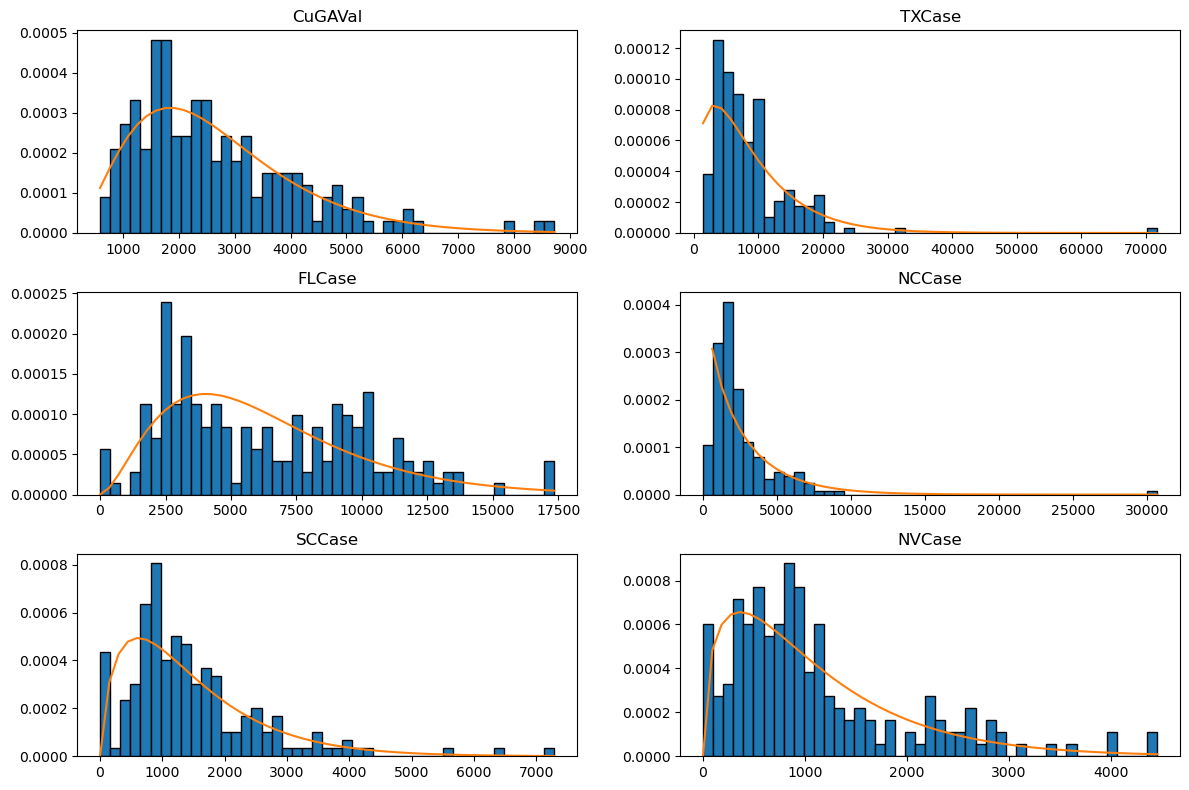

In [6]:
# loop to plots all 6 state case data distrabutions
axs = State61.hist(density=True, figsize=(12, 8) ,bins=45, grid=False, ec='black')

# min and max values for each state
smin = State61.min()
smax = State61.max()

# loop through the 6 states and plot each distribution
for ax in axs.ravel():
    
    # Get the state title
    m = ax.get_title()
    
    # Plot the gamma distribution on top of the histogram
    x = np.linspace(smin[m], smax[m])
    y = gamma.pdf(x, a=alm[m], scale=bem[m])
    ax.plot(x, y)
    
plt.tight_layout()

#### Looking at the distributions most of them look pretty similar with a right sided skewness, which implies to us that there are a larger proportion of days where people get covid closer to the min values. The lower the line gets the probability of it happening goes down.

### Part 2: Poisson 
#### Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did. (25 points)

  -  For example, number of new cases and deaths per 100,000 population.
  -  Hint - the parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.


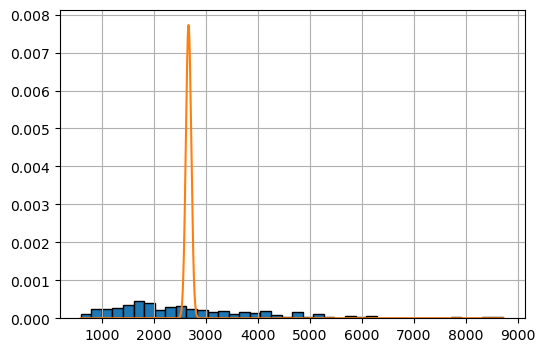

In [7]:
from scipy.stats import poisson

State61.CuGAVal.hist(density=True, bins=40, ec='black', figsize=(6,4))
X = np.arange( State61.CuGAVal.min(), State61.CuGAVal.max())
plt.plot( X, (poisson.pmf(X, gamean[0])))

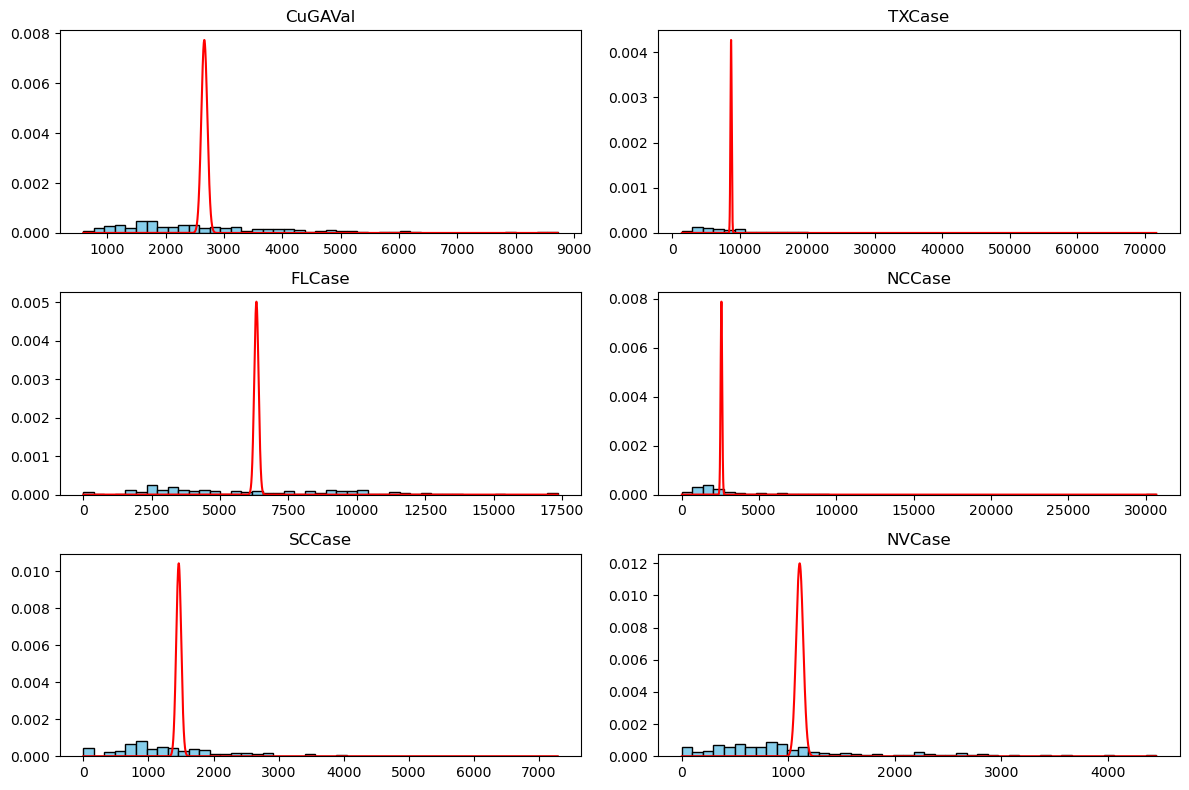

In [8]:
axs = State61.hist(density=True, figsize=(12, 8) ,bins=45, grid=False, ec='black', color='skyblue')

# min and max values for each state
smin = State61.min()
smax = State61.max()

# loop through the 6 states and plot each distribution
for ax in axs.ravel():
    
    # Get the state title
    m = ax.get_title()
    
    # Plot the poisson line on top of the histograms
    x = np.arange(smin[m], smax[m])
    y = poisson.pmf(x, gamean[m])
    ax.plot(x, y, color='r')
    
plt.tight_layout()

#### Now we repeat the process for the death cases.


In [9]:
State6d = pd.read_csv('Data/6_State_death_stats-v1.csv').set_index('Unnamed: 0')

State61d = State6d.T

# get the means for each state
gameanD = State61d.mean() 

State61d.head()

Unnamed: 0,GAdeath,TXdeath,FLdeath,NCdeath,SCdeath,NVdeath
0,2852,3487,3617,1378,777,524
1,2856,3622,3684,1388,786,528
2,2859,3767,3702,1395,805,530
3,2860,3899,3731,1396,813,534
4,2882,4049,3778,1398,818,537


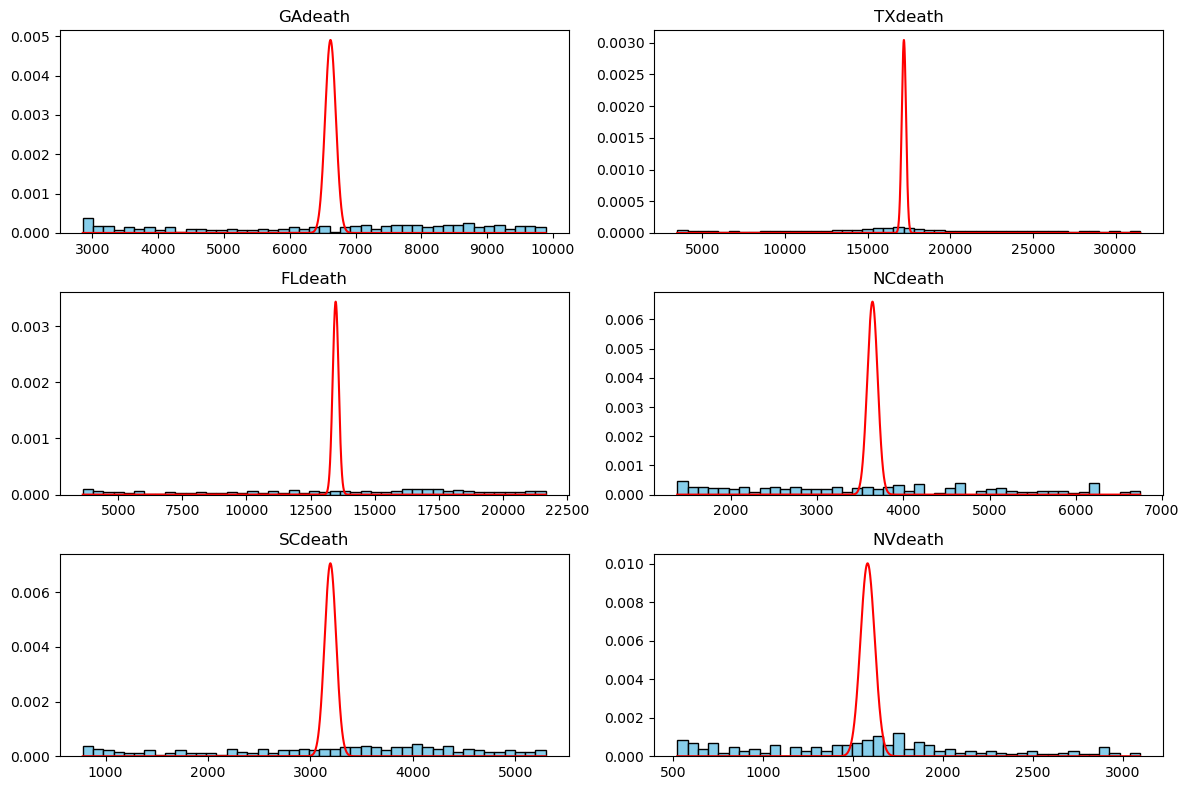

In [10]:
axs = State61d.hist(density=True, figsize=(12, 8) ,bins=45, grid=False, ec='black', color='skyblue')

# min and max values for each state
smin = State61d.min()
smax = State61d.max()

# loop through the 6 states and plot each distribution
for ax in axs.ravel():
    
    # Get the state title
    m = ax.get_title()
    
    # Plot the poisson line on top of the histograms
    x = np.arange(smin[m], smax[m])
    y = poisson.pmf(x, gameanD[m])
    ax.plot(x, y, color='r')
    
plt.tight_layout()

#### Describe how the poission modeling is different from the first modeling you did:
This is very different from the gamma distribution that I had done on the same data set. From what we can see the data from both cases and deaths does not neatly fit with a Poisson distribution, and it would be a better idea to use a different distribution. The main problem with the data is that it is over-dispersed, so it won’t work properly with a Poisson distribution.

#### Now im going to take the means of the 6 states death and case categories and create poisson distrabutions where the function works and the line works right.

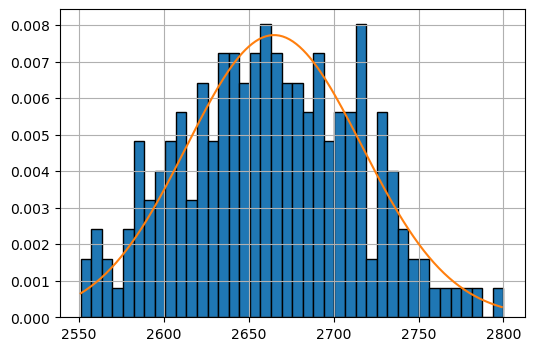

In [11]:
# generate samples using the means from each data set. 
# 200 is close to the number of dates in the range we have.
s1 = pd.DataFrame({'GAsamCase': poisson.rvs(mu=gamean[0],size=200)})
s2 = pd.DataFrame({'TXsamCase': poisson.rvs(mu=gamean[1],size=200)})
s3 = pd.DataFrame({'FLsamCase': poisson.rvs(mu=gamean[2],size=200)})
s4 = pd.DataFrame({'NCsamCase': poisson.rvs(mu=gamean[3],size=200)})
s5 = pd.DataFrame({'SCsamCase': poisson.rvs(mu=gamean[4],size=200)})
s6 = pd.DataFrame({'NVsamCase': poisson.rvs(mu=gamean[5],size=200)})
# same for deaths, gameanD is used
s7 = pd.DataFrame({'GAsamDeath': poisson.rvs(mu=gameanD[0],size=200)})
s8 = pd.DataFrame({'TXsamDeath': poisson.rvs(mu=gameanD[1],size=200)})
s9 = pd.DataFrame({'FLsamDeath': poisson.rvs(mu=gameanD[2],size=200)})
s10 = pd.DataFrame({'NCsamDeath': poisson.rvs(mu=gameanD[3],size=200)})
s11 = pd.DataFrame({'SCsamDeath': poisson.rvs(mu=gameanD[4],size=200)})
s12 = pd.DataFrame({'NVsamDeath': poisson.rvs(mu=gameanD[5],size=200)})

# merge all into one dataframe
caseS = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12])

caseS.GAsamCase.hist(density=True, bins=40, ec='black', figsize=(6,4))
limd = np.arange(caseS.GAsamCase.min(), caseS.GAsamCase.max())
plt.plot( limd, (poisson.pmf(limd, gamean[0])))

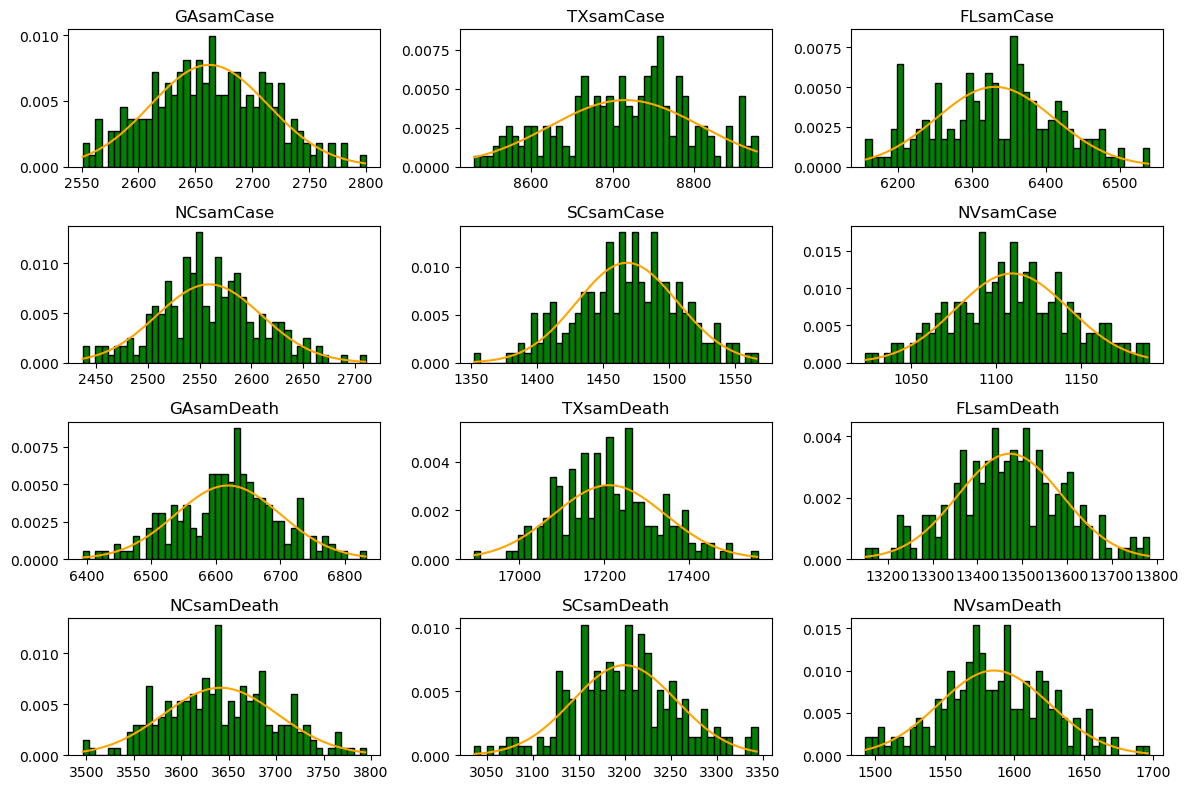

In [12]:
axs = caseS.hist(density=True,
                 figsize=(12, 8),
                 bins=45,
                 grid=False,
                 ec='black',
                 color='g')
tempM = caseS.mean()
# min and max values for each state
smin = caseS.min()
smax = caseS.max()

# loop through the 6 states and plot each distribution
for ax in axs.ravel():
    
    # Get the state title
    m = ax.get_title()
    
    # Plot the poisson line on top of the histograms
    x = np.arange(smin[m], smax[m])
    y = poisson.pmf(x, tempM[m])
    ax.plot(x, y, color='orange')
    
plt.tight_layout()

Here we can see a better example of what the distribution would look like if they were a better fit for this distribution. Which when compared to the gamma distribution it is more centered to the middle and does not go very far to the left or right.

### Part 3: Correlation
Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns. (20 points)

    You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.


In [13]:
# reading out enrichment data
cov23 = pd.read_csv('Data/censusEnrichData.csv')
cov23.head()

,Unnamed: 0,countyFIPS,County Name,State_x,population,Male,Female,Under 18 years,18 years and over,65 years and over
0,0,1003,Baldwin County,AL,223234,"120,664","125,771","51,269","195,166","53,946"
1,1,1015,Calhoun County,AL,113605,"56,554","59,234","24,410","91,378","21,445"
2,2,1043,Cullman County,AL,83768,"45,051","45,614","20,170","70,495","17,376"
3,3,1049,DeKalb County,AL,71513,"36,024","35,974","17,043","54,955","12,763"
4,4,1051,Elmore County,AL,81209,"43,448","46,115","18,970","70,593","14,594"


In [14]:
# Altering the data for later use.
enrichMer = cov23.copy(deep=True)

# Remove commas from columns with numeric values
enrichMer['Male']=enrichMer['Male'].str.replace(',','')
enrichMer['Female']=enrichMer['Female'].str.replace(',','')
enrichMer['18 years and over']=enrichMer['18 years and over'].str.replace(',','')
enrichMer['Under 18 years']=enrichMer['Under 18 years'].str.replace(',','')
enrichMer['65 years and over']=enrichMer['65 years and over'].str.replace(',','')

# converting same columns into numerics for calculations.
enrichMer['Male'] = pd.to_numeric(enrichMer['Male'])
enrichMer['Female'] = pd.to_numeric(enrichMer['Female'])
enrichMer['18 years and over'] = pd.to_numeric(enrichMer['18 years and over'])
enrichMer['Under 18 years'] = pd.to_numeric(enrichMer['Under 18 years'])
enrichMer['65 years and over'] = pd.to_numeric(enrichMer['65 years and over'])

# narrow down the data set to GA
enrichMer = enrichMer[enrichMer['State_x'] == 'GA']

# Calculate the the Ratio of males to the total population of a county.
enrichMer['Ratio of Males to Pop'] = enrichMer.apply(lambda row: row.Male / row.population, axis = 1)
enrichMer.head()

,Unnamed: 0,countyFIPS,County Name,State_x,population,Male,Female,Under 18 years,18 years and over,65 years and over,Ratio of Males to Pop
140,140,13013,Barrow County,GA,83240,43604,45695,22202,67097,11728,0.523835
141,141,13015,Bartow County,GA,107738,54917,57899,25830,86986,15946,0.509727
142,142,13021,Bibb County,GA,153159,73370,82827,37693,118504,26649,0.479045
143,143,13031,Bulloch County,GA,79608,40564,42495,16261,66798,10106,0.509547
144,144,13045,Carroll County,GA,119992,61197,63395,29237,95355,17912,0.510009


In [15]:
# drop extra dates from the data set from table
dropped_dates = [col for col in covC.columns if (('2020-01-22' <= col <= '2020-07-01') or ('2021-01-01' < col)) and (('-' in col))]
covC.drop(columns=dropped_dates, inplace=True)

# New Dataframe to alter
covC4 = covC.copy(deep=True)

# Create a list of columns to remove that we do not curently need
fil_columns = ['StateFIPS'] # 'countyFIPS'
covC4.drop(columns = fil_columns, inplace=True)

# Grab only counties from GA to add together
covC4 = covC4[covC4['State'] == 'GA']

# merge enrichment dataset with the covid cases data set.
testing = pd.merge(covC4, enrichMer, left_on='countyFIPS', right_on='countyFIPS', how='inner')
testing.head()

,countyFIPS,County Name_x,State,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,Unnamed: 0,County Name_y,State_x,population,Male,Female,Under 18 years,18 years and over,65 years and over,Ratio of Males to Pop
0,13013,Barrow County,GA,519,527,535,535,546,568,574,...,140,Barrow County,GA,83240,43604,45695,22202,67097,11728,0.523835
1,13015,Bartow County,GA,739,748,767,774,795,821,843,...,141,Bartow County,GA,107738,54917,57899,25830,86986,15946,0.509727
2,13021,Bibb County,GA,1021,1074,1163,1231,1276,1449,1497,...,142,Bibb County,GA,153159,73370,82827,37693,118504,26649,0.479045
3,13031,Bulloch County,GA,433,470,483,508,516,536,546,...,143,Bulloch County,GA,79608,40564,42495,16261,66798,10106,0.509547
4,13045,Carroll County,GA,751,775,814,847,871,883,917,...,144,Carroll County,GA,119992,61197,63395,29237,95355,17912,0.510009


In [18]:
# Calculating rates of infection per county
testing['Rates of Infection'] = (((testing['2020-12-31'] - testing['2020-07-02'])/testing['population'])*100)

# Normalizing the 18 years under column per 1000
testing['Normalized 18 years under'] = (testing['Under 18 years']/testing['population']*1000)
testing.head()

,countyFIPS,County Name_x,State,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,State_x,population,Male,Female,Under 18 years,18 years and over,65 years and over,Ratio of Males to Pop,Rates of Infection,Normalized 18 years under
0,13013,Barrow County,GA,519,527,535,535,546,568,574,...,GA,83240,43604,45695,22202,67097,11728,0.523835,5.154974,266.722729
1,13015,Bartow County,GA,739,748,767,774,795,821,843,...,GA,107738,54917,57899,25830,86986,15946,0.509727,5.409419,239.748278
2,13021,Bibb County,GA,1021,1074,1163,1231,1276,1449,1497,...,GA,153159,73370,82827,37693,118504,26649,0.479045,5.435528,246.103722
3,13031,Bulloch County,GA,433,470,483,508,516,536,546,...,GA,79608,40564,42495,16261,66798,10106,0.509547,4.140287,204.263391
4,13045,Carroll County,GA,751,775,814,847,871,883,917,...,GA,119992,61197,63395,29237,95355,17912,0.510009,3.746083,243.657911


#### With the data necessary data normalized and merged together we can now test and see if there is a correlation between rates of infection and counties with larger populations of people under the age of 18.

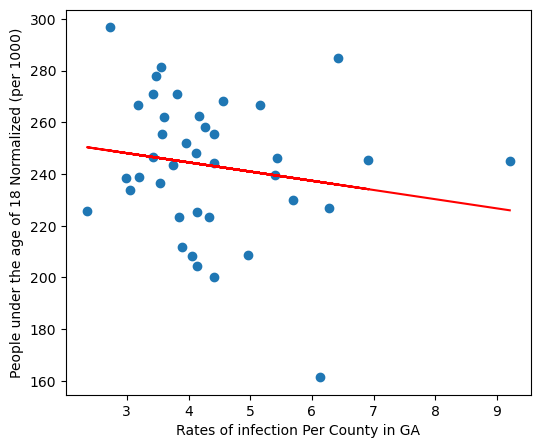

Correlation of X and Y: -0.17


In [17]:
# Getting the correlation between Rates of infection
# and people under the age of 18.
plt.figure(figsize=(6,5))
plt.scatter(testing['Rates of Infection'], testing['Normalized 18 years under'])
m, b = np.polyfit(testing['Rates of Infection'], testing['Normalized 18 years under'], 1)

# X and Y labels
plt.xlabel('Rates of infection Per County in GA')
plt.ylabel('People under the age of 18 Normalized (per 1000)')

# ploting the line, for the correlation.
plt.plot(testing['Rates of Infection'], m*testing['Rates of Infection'] + b, 'r-')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(testing['Rates of Infection'], testing['Normalized 18 years under'])[0, 1])

#### Observe Patterns
Looking at the correlation coefficient  we know that there is not much of a correlation since the value outputted is pretty close to 0. So, when it comes to populations of people under the age of 18 and rates of infection there is not much of a correlation there.


### Part 4: Hypothesis
Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. (30 points)

#### First hypothesis test: Do counties with larger populations of people over the age of 65 lead to higher rates of infection or higher numbers of covid cases.

1. **Null Hypothesis (H0)**
    - There is no relation between higher populations of people over the age of 65 to higher rates of infection, or higher numbers of covid cases.
    
2. **Alternate hypothesis (H1)**
    - There is relation between higher populations of people over the age of 65 to higher rates of infection, or higher numbers of covid cases.
    
    

